Aprile, Amezquita, Schaber <br>
CPE-695 Final Project <br>
Facial Expression Detection with Limited Features

# <font color=navy> **MODEL #3: Support Vector Machines (SVM)**

In [ ]:
# Imports
from google.colab import drive
import numpy as np
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
%matplotlib inline
import matplotlib.pyplot as plt

# Data Loading and Preprocessing

In [ ]:
# Mount the drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Get data
X_train = np.load('/content/drive/MyDrive/CPE-695 Final Project/Data/cropped_train_data.npy')
X_test = np.load('/content/drive/MyDrive/CPE-695 Final Project/Data/cropped_test_data.npy')
y_train = np.load('/content/drive/MyDrive/CPE-695 Final Project/Data/cropped_train_labels_1D.npy')
y_test = np.load('/content/drive/MyDrive/CPE-695 Final Project/Data/cropped_test_labels_1D.npy')

In [ ]:
# Confirm shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28709, 29, 48)
(7178, 29, 48)
(28709,)
(7178,)


In [ ]:
# Need to reshape data arrays to 2D - feature matrix
train_features = X_train.reshape(28709, 29*48)
test_features = X_test.reshape(7178, 29*48)

print(train_features.shape)
print(test_features.shape)

(28709, 1392)
(7178, 1392)


In [ ]:
# Define scaler
ss = StandardScaler()

# Scale the features
train_features_std = ss.fit_transform(train_features)
test_features_std = ss.fit_transform(test_features)

# Principal Component Analysis

In [ ]:
# Principal Component Analysis 
# Keep all components
pca = PCA()
pca.fit(train_features_std)

print(pca.n_components_)
print(pca.explained_variance_ratio_)

1392
[3.18072731e-01 1.04694582e-01 1.00881482e-01 ... 1.07218752e-06
 1.04186235e-06 1.03112421e-06]


In [ ]:
pca.explained_variance_ratio_[:15]

array([0.31807273, 0.10469458, 0.10088148, 0.0555381 , 0.02854764,
       0.02760292, 0.02409159, 0.02060593, 0.01799302, 0.01441402,
       0.01361395, 0.01081094, 0.00948085, 0.00912741, 0.00813008])

In [ ]:
pca = PCA(.95)

In [ ]:
pca.fit(train_features_std)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.n_components_ # For 95% of explained variance

160

In [ ]:
pca = PCA(.85)
pca.fit(train_features_std)

PCA(copy=True, iterated_power='auto', n_components=0.85, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.n_components_ # For 85% of explained variance

35

In [ ]:
pca = PCA(.75)
pca.fit(train_features_std)

PCA(copy=True, iterated_power='auto', n_components=0.75, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.n_components_ # For 75% of explained variance

14

In [ ]:
### Do some data exploration
pca2 = PCA(2)
train2 = pca2.fit_transform(train_features_std)

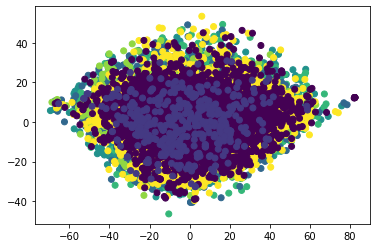

In [ ]:
# Plot projected PC to understand data
plt.scatter(train2[:,0], train2[:,1], c=y_train)
plt.show()

In [ ]:
# Visualize top 10 principle components = ~ 60% of explained variance
pca10 = PCA(10)

train10 = pca10.fit_transform(train_features_std)

In [ ]:
print(np.cumsum(pca10.explained_variance_ratio_))

[0.31807273 0.42276731 0.5236488  0.57918689 0.60773453 0.63533745
 0.65942905 0.68003497 0.69802799 0.71244201]


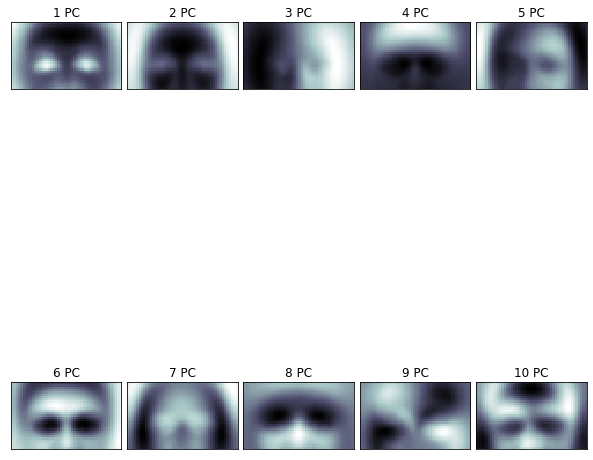

In [ ]:
fig = plt.figure(figsize=(8,10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.0, wspace=0.05)

for i in range(10):
  ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
  ax.title.set_text(str(i+1) + ' PC')
  ax.imshow(np.reshape(pca10.components_[i,:], (29,48)), cmap=plt.cm.bone, interpolation='nearest')

In [ ]:
# Plot test image reconstructed with top 5 components
img = train_features_std[0].reshape(29, 48)
img.shape

(29, 48)

In [ ]:
fig2 = plt.figure(figsize=(8,10))
fig2.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.0, wspace=0.05)

<Figure size 576x720 with 0 Axes>

PC 1 Explained variance: 0.39869102439820026
PC 2 Explained variance: 0.5412700335194147
PC 3 Explained variance: 0.6432693611037161
PC 4 Explained variance: 0.7214895170270448
PC 5 Explained variance: 0.7753611522361763
PC 6 Explained variance: 0.812693556717163
PC 7 Explained variance: 0.8421244369508674
PC 8 Explained variance: 0.8667397411990909
PC 9 Explained variance: 0.8880694358642881
PC 10 Explained variance: 0.9075002040829063
PC 11 Explained variance: 0.9206023530063825
PC 12 Explained variance: 0.9330749928301334
PC 13 Explained variance: 0.9445244821757762
PC 14 Explained variance: 0.9551441506189958
PC 15 Explained variance: 0.9631660893050251


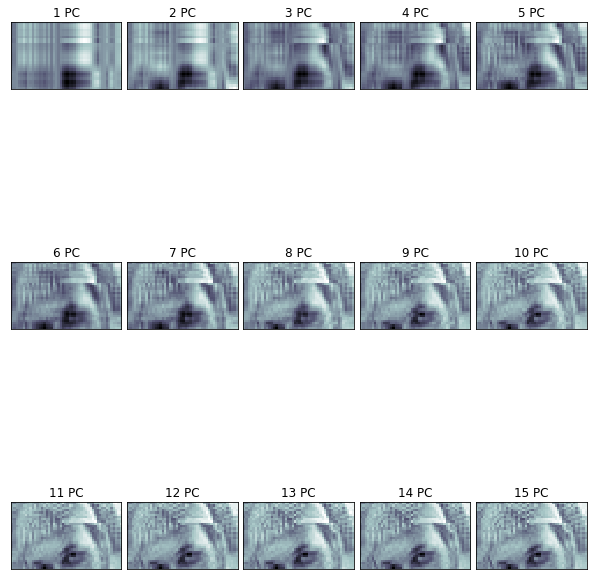

In [ ]:
fig2 = plt.figure(figsize=(8,10))
fig2.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.0, wspace=0.05)

# Explore reconstruction using top 5 principle components
for i in range(1,16):
  pca = PCA(i).fit(img)
  img_transformed = pca.transform(img)

  temp = pca.inverse_transform(img_transformed).reshape(29,48)

  print('PC ' + str(i) + ' Explained variance:', np.sum(pca.explained_variance_ratio_))

  ax = fig2.add_subplot(3, 5, i, xticks=[], yticks=[])

  ax.title.set_text(str(i) + ' PC')

  ax.imshow(temp, cmap=plt.cm.bone, interpolation='nearest')


# Grid Search

Based on the above conditions, we would want to have 15 PC in our final model. However, due to training time constraints (especially since can't use Linear Kernel for this problem) will use 15 in only LinearSVC and then 1-3 in rbf kernel.

In [ ]:
# Grid search for RBF Kernel
pc = list(range(1,6))

# C = penalty parameter
cs = [0.1, 1, 10, 100]

for p in pc:
  pca = PCA(n_components=p)

  train_pca = pca.fit_transform(train_features_std)
  test_pca = pca.fit_transform(test_features_std)
  
  train_acc = []
  test_acc = []

  i = 1 

  for c in cs:
    svc = SVC(kernel='rbf', C=c).fit(train_pca, y_train)

    test_ac = accuracy_score(y_test, svc.predict(test_pca))
    train_ac = accuracy_score(y_train, svc.predict(train_pca))

    print(i, p, c, train_ac, test_ac)
    train_acc.append(train_ac)
    test_acc.append(test_ac)

    i+=1



1 1 0.1 0.2554599602911979 0.2509055447199777
2 1 1 0.25580828311679266 0.2490944552800223
3 1 10 0.2562611027900658 0.24993034271384787
4 1 100 0.2562611027900658 0.2495123989969351
1 2 0.1 0.2565745933331011 0.2497910281415436
2 2 1 0.2585252011564318 0.2506269155753692
3 2 10 0.2599184924588108 0.25257731958762886
4 2 100 0.2616601065867846 0.25327389244915016
1 3 0.1 0.2593263436552997 0.25146280300919477
2 3 1 0.2616949388693441 0.25369183616606295
3 3 10 0.26583998049392177 0.25466703817219283
4 3 100 0.27040300950921314 0.25299526330454164
1 4 0.1 0.26305339788916365 0.24993034271384787
2 4 1 0.27169180396391374 0.24853719699080523
3 4 10 0.28071336514681805 0.24853719699080523
4 4 100 0.29342714828102684 0.2407355809417665
1 5 0.1 0.26232191995541465 0.2503482864307607
2 5 1 0.27489637395938554 0.25048760100306494
3 5 10 0.2922428506740047 0.24393981610476456
4 5 100 0.3197603538959908 0.23767066035107273


# Final Modeling Training & Performance Evaluation

In [ ]:
# Use three principal components
pca14 = PCA(3)

In [ ]:
train_pca = pca14.fit_transform(train_features_std)
test_pca = pca14.fit_transform(test_features_std)

In [ ]:
start = time.time()
svc14 = SVC(kernel='rbf', C=10).fit(train_pca, y_train)
end = time.time()

In [ ]:
train_pred = svc14.predict(train_pca)

In [ ]:
test_pred = svc14.predict(test_pca)

In [ ]:
accuracy_score(y_train, train_pred)

0.26590964505904074